# 세미 프로잭트
## #01. 작업준비
### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import scipy.stats as stats



In [2]:
df = pd.read_excel("마지막데이터.xlsx")
df.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,income,loan1,loan2,loan3,loan5,loan6,loan7,loan8,y_total,y_train
0,0,2,3,1,2,2,2,3,1,1,...,405.0,10000,0,0,0,0,0,350.0,20,1
1,1,3,3,3,3,3,3,3,1,3,...,2788.0,0,0,0,0,0,0,0.0,29,1
2,2,1,4,1,1,2,1,4,1,1,...,2304.0,14000,6500,0,0,0,720,0.0,18,0
3,3,1,4,1,2,2,2,4,1,1,...,5231.0,0,0,0,0,0,0,0.0,20,1
4,4,1,4,1,3,1,1,4,1,1,...,5231.0,0,0,0,0,0,0,0.0,21,1


In [3]:
df['debt'] = df['loan1']+df['loan2']+df['loan3']+df['loan5']+df['loan6']+df['loan7']+df['loan8']
df.head()


,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,loan1,loan2,loan3,loan5,loan6,loan7,loan8,y_total,y_train,debt
0,0,2,3,1,2,2,2,3,1,1,...,10000,0,0,0,0,0,350.0,20,1,10350.0
1,1,3,3,3,3,3,3,3,1,3,...,0,0,0,0,0,0,0.0,29,1,0.0
2,2,1,4,1,1,2,1,4,1,1,...,14000,6500,0,0,0,720,0.0,18,0,21220.0
3,3,1,4,1,2,2,2,4,1,1,...,0,0,0,0,0,0,0.0,20,1,0.0
4,4,1,4,1,3,1,1,4,1,1,...,0,0,0,0,0,0,0.0,21,1,0.0


In [4]:

df = df.iloc[:,12:]
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,loan1,loan2,loan3,loan5,loan6,loan7,loan8,y_total,y_train,debt
0,2,1945,1,4,NaN,2,NaN,5,NaN,NaN,...,10000,0,0,0,0,0,350.0,20,1,10350.0
1,1,1948,2,3,NaN,2,NaN,5,NaN,NaN,...,0,0,0,0,0,0,0.0,29,1,0.0
2,1,1942,1,7,NaN,2,NaN,5,NaN,NaN,...,14000,6500,0,0,0,720,0.0,18,0,21220.0
3,1,1962,1,6,NaN,2,NaN,5,NaN,NaN,...,0,0,0,0,0,0,0.0,20,1,0.0
4,2,1963,1,5,NaN,2,NaN,5,NaN,NaN,...,0,0,0,0,0,0,0.0,21,1,0.0


In [5]:
df.iloc[:,[-10,-9,-8,-7,-6,-5,-4]]

,loan1,loan2,loan3,loan5,loan6,loan7,loan8
0,10000,0,0,0,0,0,350.0
1,0,0,0,0,0,0,0.0
2,14000,6500,0,0,0,720,0.0
3,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...
13469,25947,0,0,0,0,67,0.0
13470,25947,0,0,0,0,67,0.0
13471,12000,0,0,0,0,360,0.0
13472,1880,0,0,0,0,0,22.0


In [6]:
df = df.drop(df.iloc[:,[-10,-9,-8,-7,-6,-5,-4]],axis=1)
df.head()


,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,y_train,debt
0,2,1945,1,4,NaN,2,NaN,5,NaN,NaN,...,2,4,0,4,NaN,1,405.0,20,1,10350.0
1,1,1948,2,3,NaN,2,NaN,5,NaN,NaN,...,0,5,0,1,942.0,1,2788.0,29,1,0.0
2,1,1942,1,7,NaN,2,NaN,5,NaN,NaN,...,0,2,0,1,762.0,1,2304.0,18,0,21220.0
3,1,1962,1,6,NaN,2,NaN,5,NaN,NaN,...,0,2,0,1,855.0,1,5231.0,20,1,0.0
4,2,1963,1,5,NaN,2,NaN,5,NaN,NaN,...,2,2,0,1,399.0,1,5231.0,21,1,0.0


### 데이터 정제

#### y값만 냄겨두기 

In [7]:
df = df.drop('y_train',axis=1)
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt
0,2,1945,1,4,NaN,2,NaN,5,NaN,NaN,NaN,2,4,0,4,NaN,1,405.0,20,10350.0
1,1,1948,2,3,NaN,2,NaN,5,NaN,NaN,NaN,0,5,0,1,942.0,1,2788.0,29,0.0
2,1,1942,1,7,NaN,2,NaN,5,NaN,NaN,NaN,0,2,0,1,762.0,1,2304.0,18,21220.0
3,1,1962,1,6,NaN,2,NaN,5,NaN,NaN,NaN,0,2,0,1,855.0,1,5231.0,20,0.0
4,2,1963,1,5,NaN,2,NaN,5,NaN,NaN,NaN,2,2,0,1,399.0,1,5231.0,21,0.0


#### 데이터 라밸링

In [8]:
df['y_train']=np.where(df['y_total'] > 22,1,0)
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,2,1945,1,4,NaN,2,NaN,5,NaN,NaN,...,2,4,0,4,NaN,1,405.0,20,10350.0,0
1,1,1948,2,3,NaN,2,NaN,5,NaN,NaN,...,0,5,0,1,942.0,1,2788.0,29,0.0,1
2,1,1942,1,7,NaN,2,NaN,5,NaN,NaN,...,0,2,0,1,762.0,1,2304.0,18,21220.0,0
3,1,1962,1,6,NaN,2,NaN,5,NaN,NaN,...,0,2,0,1,855.0,1,5231.0,20,0.0,0
4,2,1963,1,5,NaN,2,NaN,5,NaN,NaN,...,2,2,0,1,399.0,1,5231.0,21,0.0,0


In [9]:
df.loc[df['gen']==1 ,'gen'] = 'male'
df.loc[df['gen']==2 ,'gen'] = 'female'


In [10]:
df['gen'].unique()

array(['female', 'male'], dtype=object)

In [11]:
df['age']=2023-df['age']
df['age'].head()

0    78
1    75
2    81
3    61
4    60
Name: age, dtype: int64

In [12]:
df.loc[df['religion']==1,'religion'] = 'yes'
df.loc[df['religion']==2,'religion'] = 'no'
df['religion'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train'],
      dtype='object')

In [14]:
df.loc[df['edu']<=3,'edu']="초졸이하"
df.loc[df['edu']==4,'edu']="중졸"
df.loc[df['edu']==5,'edu']="고졸"
df.loc[df['edu']==6,'edu']="대졸이상"
df.loc[df['edu']==7,'edu']="대졸이상"
df.loc[df['edu']==8,'edu']="대졸이상"
df.loc[df['edu']==9,'edu']="대졸이상"


In [15]:
df['edu'].unique()

array(['중졸', '초졸이하', '대졸이상', '고졸'], dtype=object)

In [16]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'debt', 'y_train'],
      dtype='object')

In [17]:
df.loc[df['sm_state']==1 ,"sm_state"] = 'yes'
df.loc[df['sm_state']==2 ,"sm_state"] = 'no'
df['sm_state'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
df.loc[df['dr_mean_year']==1 ,"dr_mean_year"] = '월1회'
df.loc[df['dr_mean_year']==2 ,"dr_mean_year"] = '월2~3회'
df.loc[df['dr_mean_year']==3 ,"dr_mean_year"] = '주2~3회'
df.loc[df['dr_mean_year']==4 ,"dr_mean_year"] = '주4회이상'
df.loc[df['dr_mean_year']==5 ,"dr_mean_year"] = '전혀마시지않음'
df['dr_6cup'].unique()

array([nan,  3.,  2.,  1.,  5.,  4.])

In [19]:
df.loc[df['dr_6cup']==1 ,"dr_6cup"] = '전혀'
df.loc[df['dr_6cup']==2 ,"dr_6cup"] = '연1회'
df.loc[df['dr_6cup']==3 ,"dr_6cup"] = '월1회'
df.loc[df['dr_6cup']==4 ,"dr_6cup"] = '주1회'
df.loc[df['dr_6cup']==5 ,"dr_6cup"] = '매일'
df['dr_6cup'].unique()

array([nan, '월1회', '연1회', '전혀', '매일', '주1회'], dtype=object)

In [20]:
df.loc[df['dr_hurt']==1 ,"dr_hurt"] = '전혀'
df.loc[df['dr_hurt']==2 ,"dr_hurt"] = '과거존재'
df.loc[df['dr_hurt']==3 ,"dr_hurt"] = '최근존재'
df['dr_hurt'].unique()

array([nan, '전혀', '과거존재', '최근존재'], dtype=object)

In [21]:
df.loc[df['dr_worry']==1 ,"dr_worry"] = '전혀'
df.loc[df['dr_worry']==2 ,"dr_worry"] = '과거존재'
df.loc[df['dr_worry']==3 ,"dr_worry"] = '최근존재'
df['dr_worry'].unique()

array([nan, '전혀', '과거존재', '최근존재'], dtype=object)

In [22]:
df.loc[df['preg_experience']==1 ,"preg_experience"] = '있다'
df.loc[df['preg_experience']==2 ,"preg_experience"] = '없다'
df.loc[df['preg_experience']==0 ,"preg_experience"] = '남성'

df['preg_experience'].unique()

array(['없다', '남성', '있다'], dtype=object)

In [23]:
df.loc[df['health_state']==1 ,"health_state"] = '5'
df.loc[df['health_state']==2 ,"health_state"] = '4'
df.loc[df['health_state']==3 ,"health_state"] = '3'
df.loc[df['health_state']==4 ,"health_state"] = '2'
df.loc[df['health_state']==5 ,"health_state"] = '1'
df['health_state']= df['health_state'].astype(int)
df['health_state'].unique()

array([2, 1, 4, 3, 5])

In [24]:
df['disabled'].unique()

array([ 0,  1,  4, 16, 15,  8,  3,  2, 14,  9,  6, 11, 12, 10, 13,  5],
      dtype=int64)

In [25]:
df['disabled'] = df['disabled'].apply(lambda x: 'abled' if x==0 else 'disabled')
df['disabled'].unique()

array(['abled', 'disabled'], dtype=object)

In [26]:
df.loc[df['work_state']==1 ,"work_state"] = 'work'
df.loc[df['work_state']==2 ,"work_state"] = 'work'
df.loc[df['work_state']==3 ,"work_state"] = 'work'
df.loc[df['work_state']==4 ,"work_state"] = 'nowork'
df.loc[df['work_state']==5 ,"work_state"] = 'nowork'
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

In [27]:
df.loc[df['region']==1 ,"region"] = 'city'
df.loc[df['region']==2 ,"region"] = 'city'
df.loc[df['region']==3 ,"region"] = 'city'
df.loc[df['region']==4 ,"region"] = 'country'
df.loc[df['region']==5 ,"region"] = 'country'
df['region'].unique()

array(['city', 'country'], dtype=object)

In [28]:
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,debt,y_train
0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,405.0,20,10350.0,0
1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,1,abled,work,942.0,city,2788.0,29,0.0,1
2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,762.0,city,2304.0,18,21220.0,0
3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,855.0,city,5231.0,20,0.0,0
4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,4,abled,work,399.0,city,5231.0,21,0.0,0


In [29]:
df['gen'].isnull().sum()

0

In [30]:
df.to_excel('빚추가마지막.xlsx')

In [118]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

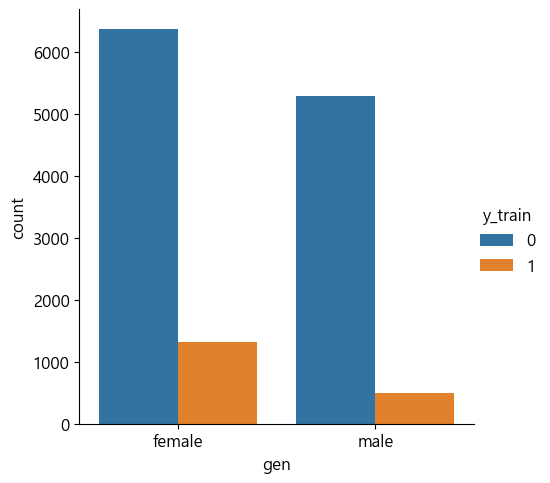

In [29]:
sns.catplot(data=df,x='gen',kind='count',hue='y_train')

In [30]:
df.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'loan1', 'loan2', 'loan3', 'loan5',
       'loan6', 'loan7', 'loan8', 'y_total', 'y_train', 'loan_total'],
      dtype='object')

<Axes: xlabel='age', ylabel='y_total'>

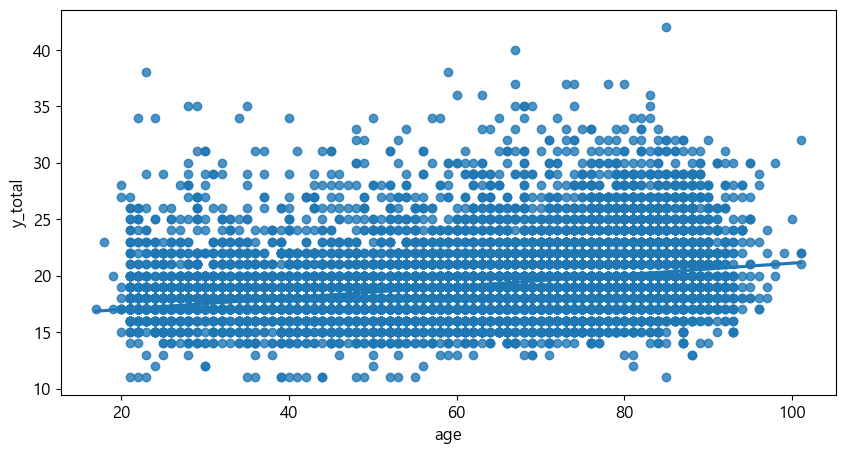

In [31]:
sns.regplot(data=df,x='age',y='y_total')

In [32]:
corr = df[['age','y_total']].corr(method='pearson')
corr

,age,y_total
age,1.000000,0.301144
y_total,0.301144,1.000000


In [33]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts


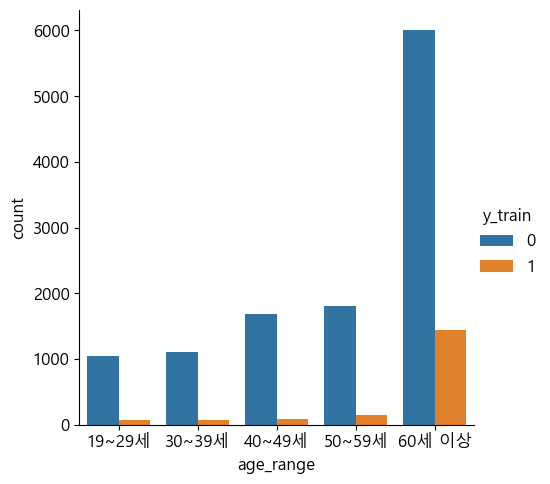

In [34]:
sns.catplot(data=df,x='age_range',kind='count',hue='y_train')

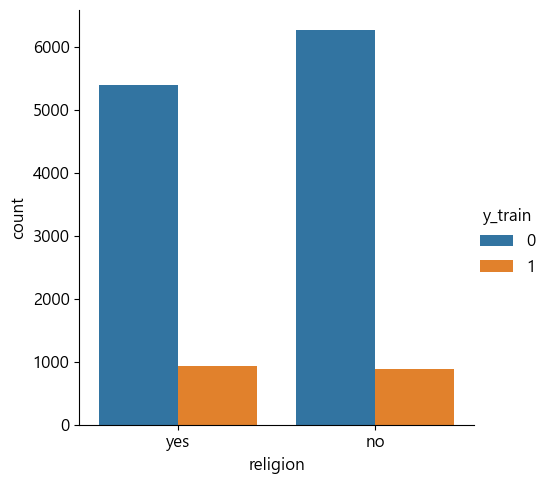

In [35]:
sns.catplot(data=df,x='religion',kind='count',hue='y_train')

In [36]:
df.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'loan1', 'loan2', 'loan3', 'loan5',
       'loan6', 'loan7', 'loan8', 'y_total', 'y_train', 'loan_total',
       'age_range'],
      dtype='object')

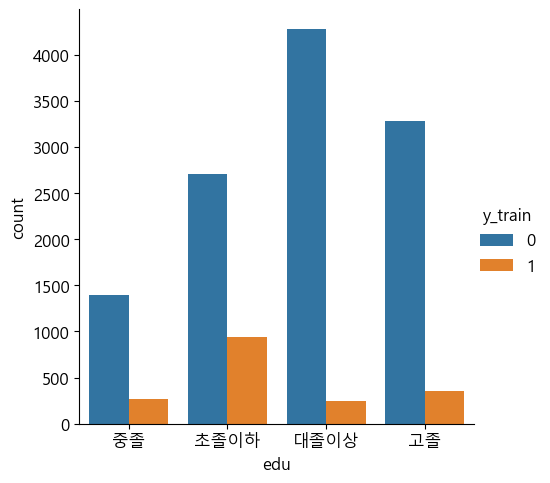

In [37]:
sns.catplot(data=df,x='edu',kind='count',hue='y_train')

In [38]:
df.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'loan1', 'loan2', 'loan3', 'loan5',
       'loan6', 'loan7', 'loan8', 'y_total', 'y_train', 'loan_total',
       'age_range'],
      dtype='object')

In [39]:
df['sm_state'].isnull().sum()

0

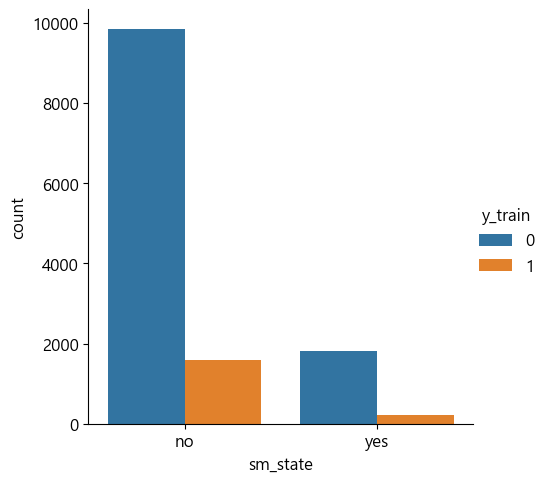

In [40]:
sns.catplot(data=df,x='sm_state',kind='count',hue='y_train')

In [41]:
df['sm_state'].value_counts()

sm_state
no     11438
yes     2036
Name: count, dtype: int64

In [42]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['sm_state']=='no'],
                            replace=False,
                            n_samples =2036 ,
                            random_state = 2020)
                            


In [43]:
sm_data = pd.concat([df[df['sm_state']=='yes'],subset_city_downsampled])
sm_data['sm_state'].value_counts()


sm_state
yes    2036
no     2036
Name: count, dtype: int64

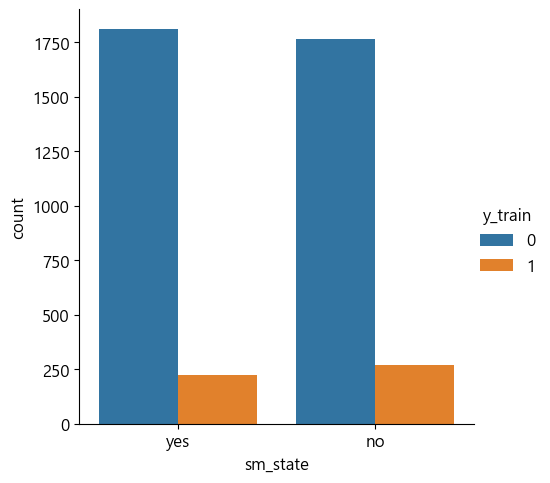

In [44]:
sns.catplot(data=sm_data,x='sm_state',kind='count',hue='y_train')

In [45]:
df.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'loan1', 'loan2', 'loan3', 'loan5',
       'loan6', 'loan7', 'loan8', 'y_total', 'y_train', 'loan_total',
       'age_range'],
      dtype='object')

,sm_year,y_total
sm_year,1.000000,0.109959
y_total,0.109959,1.000000


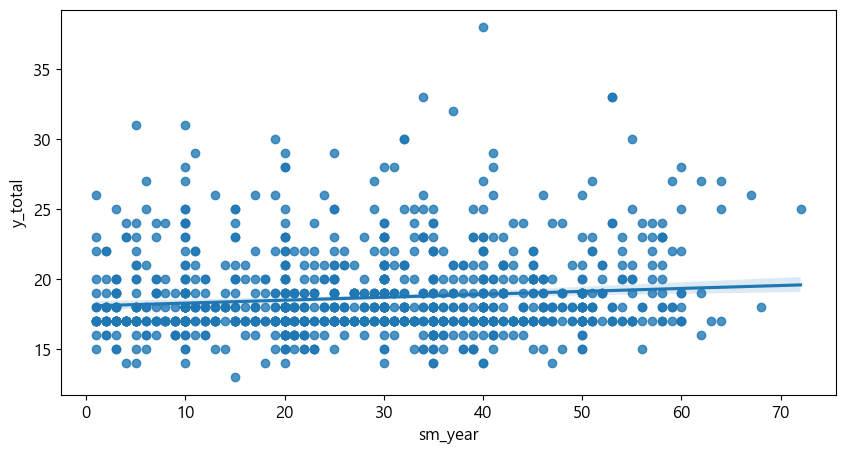

In [46]:
smoking = df.loc[df['sm_year']>0,]

sns.regplot(data=smoking,x='sm_year',y='y_total')
corr = smoking[['sm_year','y_total']].corr(method='pearson')
corr


In [47]:
corr = smoking[['sm_year','y_total']].corr(method='pearson')
corr

,sm_year,y_total
sm_year,1.000000,0.109959
y_total,0.109959,1.000000


In [48]:
df.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'loan1', 'loan2', 'loan3', 'loan5',
       'loan6', 'loan7', 'loan8', 'y_total', 'y_train', 'loan_total',
       'age_range'],
      dtype='object')

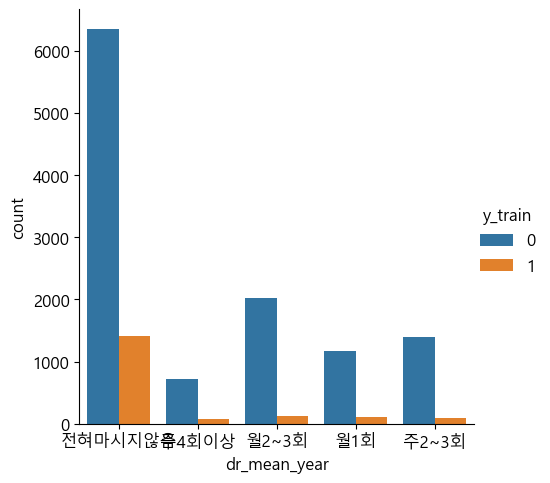

In [49]:
sns.catplot(data=df,x='dr_mean_year',kind='count',hue='y_train')

In [50]:
df['dr_6cup'].unique()

array([nan, '월1회', '연1회', '전혀', '매일', '주1회'], dtype=object)

In [51]:
over_dr = df.loc[df['dr_6cup'].notnull(),:]

over_dr['dr_6cup'].isnull().sum()

0

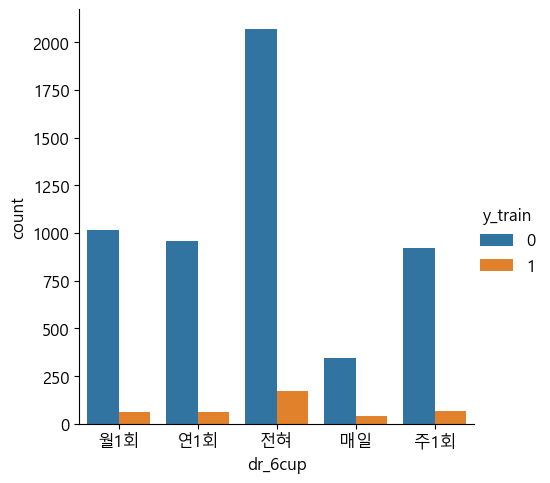

In [52]:
sns.catplot(data=over_dr,x='dr_6cup',kind='count',hue='y_train')

In [53]:
df.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'loan1', 'loan2', 'loan3', 'loan5',
       'loan6', 'loan7', 'loan8', 'y_total', 'y_train', 'loan_total',
       'age_range'],
      dtype='object')

In [54]:
df['dr_hurt'].unique()

array([nan, '전혀', '과거존재', '최근존재'], dtype=object)

# 다치게한경험 칼럼이랑 걱정시키게한경험 칼럼 없애기 

In [55]:
hurt = df.loc[df['dr_hurt'].notnull(),:]
hurt = hurt.loc[hurt['dr_hurt']!='전혀',:]


In [56]:
df.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'loan1', 'loan2', 'loan3', 'loan5',
       'loan6', 'loan7', 'loan8', 'y_total', 'y_train', 'loan_total',
       'age_range'],
      dtype='object')

In [57]:
df['preg_experience'].unique()

array(['없다', '남성', '있다'], dtype=object)

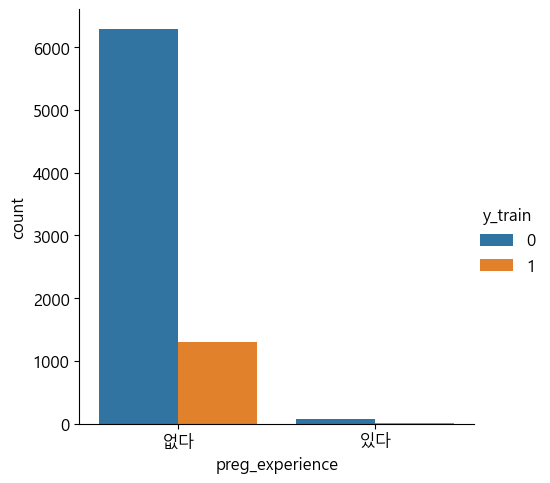

In [58]:
woman = df.loc[df['preg_experience']!='남성']
sns.catplot(data=woman,x='preg_experience',kind='count',hue='y_train')

In [59]:
woman['preg_experience'].value_counts()

preg_experience
없다    7596
있다      86
Name: count, dtype: int64

In [60]:

subset_city_downsampled = resample(woman[woman['preg_experience']=='없다'],
                            replace=False,
                            n_samples =100 ,
                            random_state = 2020)


In [61]:
sm_data = pd.concat([woman[woman['preg_experience']=='있다'],subset_city_downsampled])
sm_data['preg_experience'].value_counts()

preg_experience
없다    100
있다     86
Name: count, dtype: int64

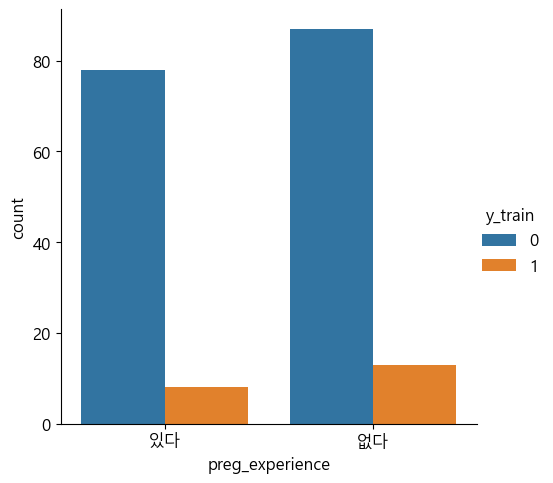

In [62]:
sns.catplot(data=sm_data,x='preg_experience',kind='count',hue='y_train')

In [63]:
df.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state',
       'sm_day', 'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry',
       'preg_experience', 'health_state', 'disabled', 'work_state',
       'work_code', 'region', 'income', 'loan1', 'loan2', 'loan3', 'loan5',
       'loan6', 'loan7', 'loan8', 'y_total', 'y_train', 'loan_total',
       'age_range'],
      dtype='object')

In [64]:
df['health_state'].unique()

array([2, 1, 4, 3, 5])

,health_state,y_total
health_state,1.00000,-0.39022
y_total,-0.39022,1.00000


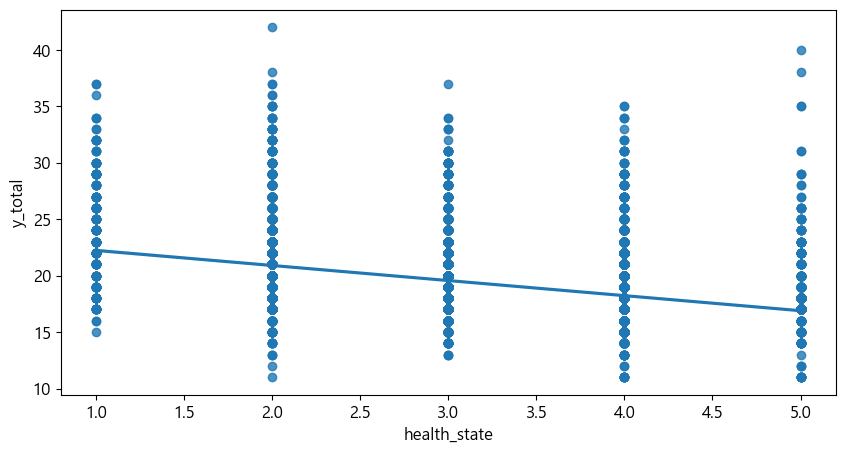

In [65]:

sns.regplot(data=df,x='health_state',y='y_total')
corr = df[['health_state','y_total']].corr(method='pearson')
corr

In [66]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

In [67]:
df['disabled'].value_counts()

disabled
abled       12187
disabled     1287
Name: count, dtype: int64

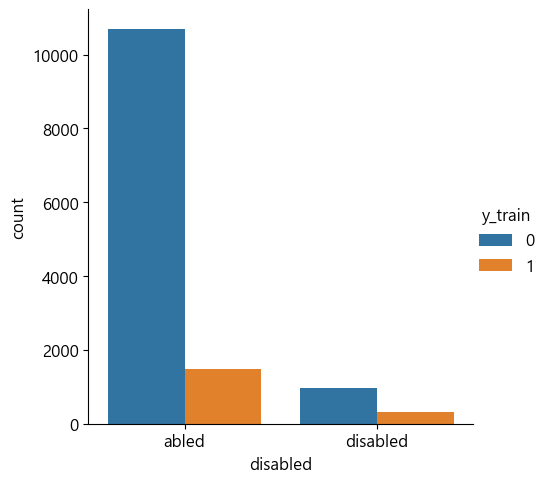

In [68]:
sns.catplot(data=df,x='disabled',kind='count',hue='y_train')

In [69]:

subset_city_downsampled = resample(df[df['disabled']=='abled'],
                            replace=False,
                            n_samples =1287 ,
                            random_state = 2020)
able = pd.concat([df[df['disabled']=='disabled'],subset_city_downsampled])
able['disabled'].value_counts()

disabled
disabled    1287
abled       1287
Name: count, dtype: int64

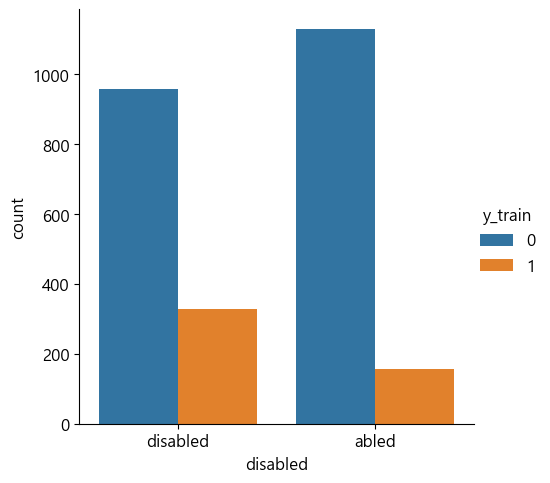

In [70]:
sns.catplot(data=able,x='disabled',kind='count',hue='y_train')

In [71]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

In [72]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

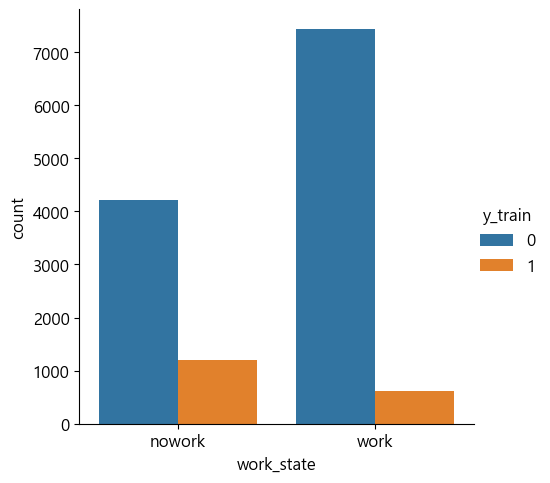

In [73]:
sns.catplot(data=df,x='work_state',kind='count',hue='y_train')

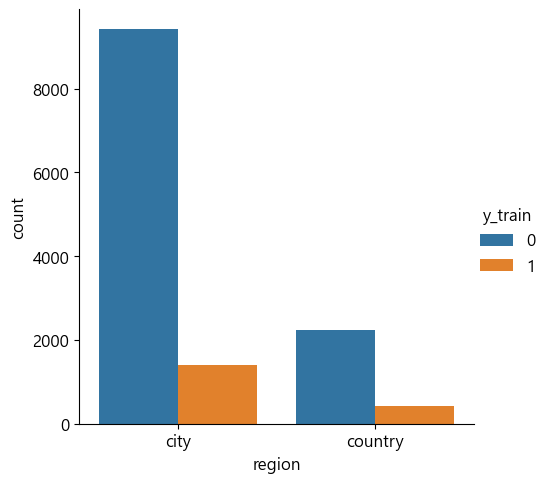

In [74]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [75]:
df['region'].value_counts()

region
city       10826
country     2648
Name: count, dtype: int64

In [76]:

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =2648 ,
                            random_state = 2020)
city = pd.concat([df[df['region']=='country'],subset_city_downsampled])
city['region'].value_counts()

region
country    2648
city       2648
Name: count, dtype: int64

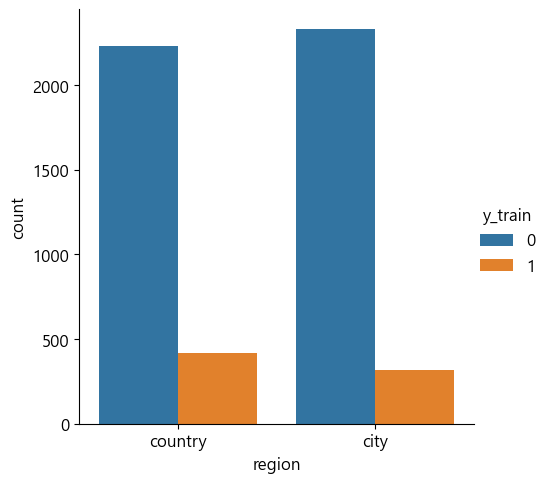

In [77]:
sns.catplot(data=city,x='region',kind='count',hue='y_train')

In [78]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

,income,y_total
income,1.000000,-0.212786
y_total,-0.212786,1.000000


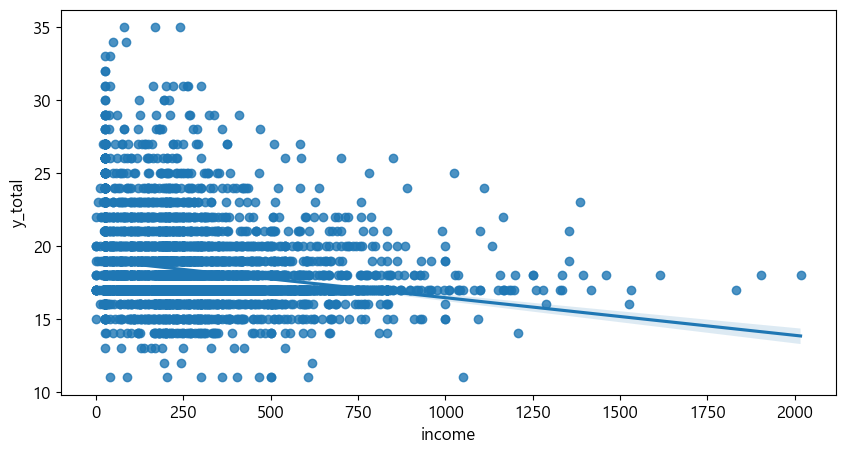

In [79]:

sns.regplot(data=df,x='income',y='y_total')
corr = df[['income','y_total']].corr(method='pearson')
corr

분산분석이던 카이제곱 검정이던 일단 독립변수에 따라 종속변수의 유의미한 차이가 있는지  가설검정

연관성 분석은 했음.

회귀분석 떄리면 됌 (다중회귀분석 + 로지스틱 회귐분석)



In [80]:
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,...,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,y_train,age_range
0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,2,abled,nowork,NaN,city,NaN,20,0,60세 이상
1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,1,abled,work,942.0,city,172.0,29,1,60세 이상
2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,762.0,city,100.0,18,0,60세 이상
3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,남성,4,abled,work,855.0,city,268.0,20,0,60세 이상
4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,...,없다,4,abled,work,399.0,city,140.0,21,0,60세 이상


In [82]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

In [127]:
new_df = df[['gen','age','edu','health_state','disabled','work_state','income','age_range','y_total','y_train']]
new_df.head()

,gen,age,edu,health_state,disabled,work_state,income,age_range,y_total,y_train
0,female,78,중졸,2,abled,nowork,NaN,60세 이상,20,0
1,male,75,초졸이하,1,abled,work,172.0,60세 이상,29,1
2,male,81,대졸이상,4,abled,work,100.0,60세 이상,18,0
3,male,61,대졸이상,4,abled,work,268.0,60세 이상,20,0
4,female,60,고졸,4,abled,work,140.0,60세 이상,21,0


### 범주형 변수들에 대한 시각화 
#### 성별

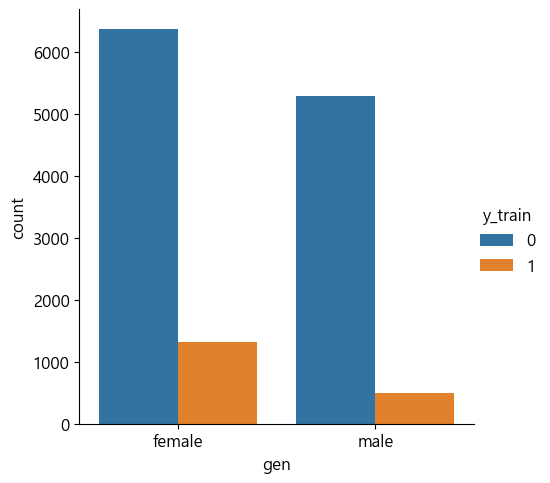

In [128]:
sns.catplot(data = new_df,x='gen',kind='count',hue='y_train')

#### 교육수준

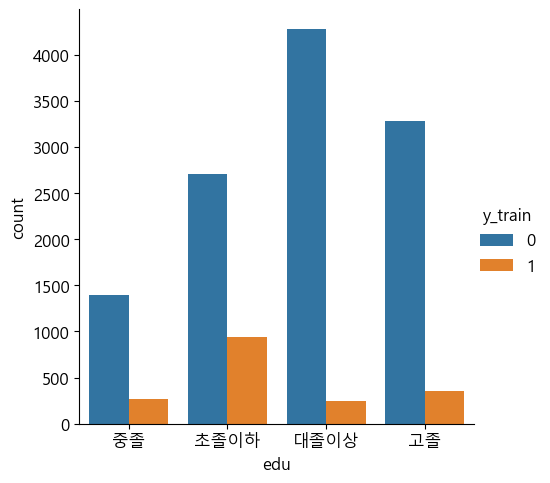

In [129]:
sns.catplot(data = new_df,x='edu',kind='count',hue='y_train')

In [130]:
# 출력 옵션 설정
pd.set_option("display.max_rows", None)  # 모든 행 표시
pd.set_option("display.max_columns", None)  # 모든 열 표시
pd.set_option("display.width", None)  # 줄 바꿈 없이 전체 내용 표시


### 정규성 검정

In [131]:
test_stat,p_val = stats.shapiro(new_df['age'])
print("정규성 검정 결과: statistic =", test_stat, "p-value =", p_val)

정규성 검정 결과: statistic = 0.9617179036140442 p-value = 0.0


c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [132]:
test_stat,p_val = stats.shapiro(new_df.loc[new_df['income'].notnull(),"income"])
print("정규성 검정 결과: statistic =", test_stat, "p-value =", p_val)

정규성 검정 결과: statistic = 0.8813180327415466 p-value = 0.0


#### 독립성

In [133]:
t_stat, p_value = ttest_ind(variable1, variable2)
print("독립표본 t-검정 결과: t-statistic =", t_stat, "p-value =", p_value)

NameError: name 'ttest_ind' is not defined

In [134]:
new_df.columns

Index(['gen', 'age', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'age_range', 'y_total', 'y_train'],
      dtype='object')

In [135]:
from statsmodels.stats.anova import anova_lm

In [136]:
new_df.columns

Index(['gen', 'age', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'age_range', 'y_total', 'y_train'],
      dtype='object')

In [139]:
formula = 'y_train ~ C(gen) * C(age_range)* C(edu) * C(health_state)*C(disabled)*C(work_state)*income'

lm = ols(formula,new_df).fit()
anova = anova_lm(lm)

anova

,df,sum_sq,mean_sq,F,PR(>F)
C(gen),1.0,3.843493,3.843493,62.119841,3.930241e-15
C(age_range),4.0,5.431234,1.357808,21.945361,5.587364e-18
C(edu),3.0,4.654326,1.551442,25.074933,4.249259e-16
C(health_state),4.0,10.290163,2.572541,41.578278,2.393449e-34
C(disabled),1.0,0.081564,0.081564,1.318257,2.509595e-01
C(work_state),1.0,0.287094,0.287094,4.640114,3.128012e-02
C(gen):C(age_range),4.0,0.684300,0.171075,2.764971,2.600809e-02
C(gen):C(edu),3.0,0.069488,0.023163,0.374365,7.715055e-01
C(age_range):C(edu),12.0,0.949892,0.079158,1.279373,2.231430e-01
C(gen):C(health_state),4.0,0.478971,0.119743,1.935324,1.017056e-01


In [138]:
new_df.head()

,gen,age,edu,health_state,disabled,work_state,income,age_range,y_total,y_train
0,female,78,중졸,2,abled,nowork,NaN,60세 이상,20,0
1,male,75,초졸이하,1,abled,work,172.0,60세 이상,29,1
2,male,81,대졸이상,4,abled,work,100.0,60세 이상,18,0
3,male,61,대졸이상,4,abled,work,268.0,60세 이상,20,0
4,female,60,고졸,4,abled,work,140.0,60세 이상,21,0


In [140]:
## 딴거 다 포함한 데이터들은 대략적인 시각화를 통해 우울감  0과 1 에 차이가 있는지 대략적인 상관성을 파악해서 잠재변수들을 걸러냈음

## 걸러낸 잠재변수들로부터 독립변수를 선정

## 선정된 독립변수들이 y_total 및 y_train에 통계적으로 유의미한 영향을 미치는지 알아본게 밑에거임

## y_total 우울정도지표인데, 우울감 경험 여부를 나누기 전에, 무엇이 우울정도 지표에 통계적으로 유의한 영향을 미치는지 알아봤다 
## 그결화
## 장애는 우울감 점수의 유의미한 차이가 없음 .
## 나이는 특정나이대범주화 시켜서 분산분석 했다

## y_train

## 각 범주형 및 연속형 변수에 따라 0인지 1인지 빈도수 및 비율을 알아봄으로써 카이제곱 검정을 통해 
## 독립변수가 종속변수에 영향을 미치는지 알아보면 됨 
## 근데 y_train에 대한 검정을 할 때 income은 제외함 -> 연속형 변수기 때문에. 
## 그래서 new_df[['income','y_total']].corr()을 통해 약한 음의 상관관계가 있다는 것과, 아노바를 통해 income에 따라 y_total이 유의미한 차이가 있다고 결과가 
## 나왔기 떄문에 독립변수로써 쓸모가 있음. 
## 밑에서 카이제곱 검정 하겠음.

In [141]:
new_df[['income','y_total']].corr()

,income,y_total
income,1.000000,-0.212786
y_total,-0.212786,1.000000


In [143]:
new_df.columns

Index(['gen', 'age', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'age_range', 'y_total', 'y_train'],
      dtype='object')

In [145]:

result_gen

y_train,0,1
gen,,
female,6370,1312
male,5290,502


In [148]:
from scipy.stats import chi2_contingency
result_gen = pd.crosstab(new_df['gen'],new_df['y_train'])
chiresult_gen = chi2_contingency(observed=result_gen)
chiresult_gen

Chi2ContingencyResult(statistic=199.8353366379684, pvalue=2.2686379928906813e-45, dof=1, expected_freq=array([[6647.77497402, 1034.22502598],
       [5012.22502598,  779.77497402]]))

In [150]:
result_age

y_train,0,1
age_range,,
19~29세,1042,71
30~39세,1108,69
40~49세,1678,86
50~59세,1810,144
60세 이상,6009,1439


In [149]:
result_age = pd.crosstab(new_df['age_range'],new_df['y_train'])
chiresult_age = chi2_contingency(observed=result_age)
chiresult_age

Chi2ContingencyResult(statistic=500.1881601693687, pvalue=6.100389097601047e-107, dof=4, expected_freq=array([[ 963.37031807,  149.62968193],
       [1018.76627527,  158.23372473],
       [1526.85107015,  237.14892985],
       [1691.30781807,  262.69218193],
       [6446.70451843, 1001.29548157]]))

In [152]:
result_edu

y_train,0,1
edu,,
고졸,3285,358
대졸이상,4281,243
중졸,1392,271
초졸이하,2702,942


In [151]:
result_edu = pd.crosstab(new_df['edu'],new_df['y_train'])
chiresult_edu = chi2_contingency(observed=result_edu)
chiresult_edu

Chi2ContingencyResult(statistic=787.0129591697416, pvalue=2.8365412580622276e-170, dof=3, expected_freq=array([[3152.54415912,  490.45584088],
       [3914.9354312 ,  609.0645688 ],
       [1439.11088021,  223.88911979],
       [3153.40952946,  490.59047054]]))

In [154]:
result_health_state

y_train,0,1
health_state,,
1,112,130
2,1873,815
3,2843,461
4,5897,363
5,935,45


In [157]:
result_health_state = pd.crosstab(new_df['health_state'],new_df['y_train'])
chiresult_health_state = chi2_contingency(observed=result_health_state)
chiresult_health_state

Chi2ContingencyResult(statistic=1374.7283108106578, pvalue=2.0862122777445187e-296, dof=4, expected_freq=array([[ 209.41962298,   32.58037702],
       [2326.11548167,  361.88451833],
       [2859.18361288,  444.81638712],
       [5417.21834645,  842.78165355],
       [ 848.06293602,  131.93706398]]))

In [155]:
new_df.columns

Index(['gen', 'age', 'edu', 'health_state', 'disabled', 'work_state', 'income',
       'age_range', 'y_total', 'y_train'],
      dtype='object')

In [159]:
result_disabled

y_train,0,1
disabled,,
abled,10702,1485
disabled,958,329


In [158]:
result_disabled = pd.crosstab(new_df['disabled'],new_df['y_train'])
chiresult_disabled = chi2_contingency(observed=result_disabled)
chiresult_disabled

Chi2ContingencyResult(statistic=177.6801371080632, pvalue=1.5558162389120512e-40, dof=1, expected_freq=array([[10546.26836871,  1640.73163129],
       [ 1113.73163129,   173.26836871]]))

In [160]:
result_work_state = pd.crosstab(new_df['work_state'],new_df['y_train'])
chiresult_work_state = chi2_contingency(observed=result_work_state)
chiresult_work_state

Chi2ContingencyResult(statistic=573.851381337482, pvalue=8.157228625223528e-127, dof=1, expected_freq=array([[4686.84577705,  729.15422295],
       [6973.15422295, 1084.84577705]]))

In [ ]:
### 의미있는거 확인해봄 
